In [5]:
# Task A: Basic Visualizations with Matplotlib

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset (assuming CSV named "Superstore.csv")
# Fixed encoding issue by specifying encoding parameter
df = pd.read_csv("Sample - Superstore.csv", encoding='latin-1')

# Select key columns
cols = ["Sales", "Profit", "Discount", "Quantity", "Category", 
        "Sub-Category", "Segment", "Region", "Ship Mode"]
df = df[cols]

# Derived attribute: Profit Margin
df["Profit Margin"] = df["Profit"] / df["Sales"]

# Handle extreme outliers: filter Sales > 10,000
df = df[df["Sales"] <= 10000]

print(df.head())

      Sales    Profit  Discount  Quantity         Category Sub-Category  \
0  261.9600   41.9136      0.00         2        Furniture    Bookcases   
1  731.9400  219.5820      0.00         3        Furniture       Chairs   
2   14.6200    6.8714      0.00         2  Office Supplies       Labels   
3  957.5775 -383.0310      0.45         5        Furniture       Tables   
4   22.3680    2.5164      0.20         2  Office Supplies      Storage   

     Segment Region       Ship Mode  Profit Margin  
0   Consumer  South    Second Class         0.1600  
1   Consumer  South    Second Class         0.3000  
2  Corporate   West    Second Class         0.4700  
3   Consumer  South  Standard Class        -0.4000  
4   Consumer  South  Standard Class         0.1125  


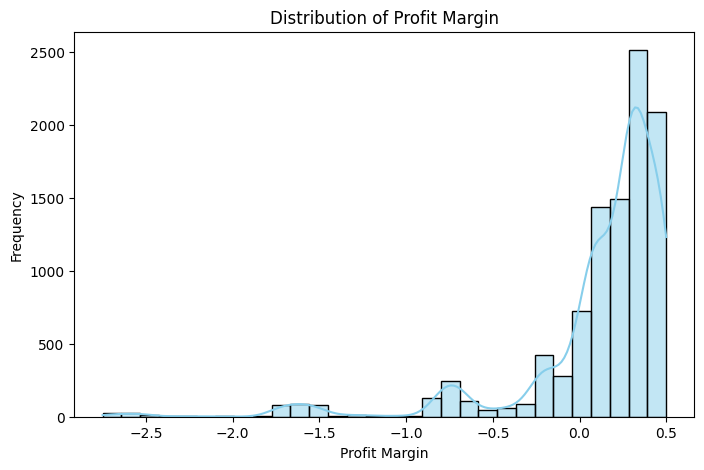

C:\Users\haadh\AppData\Local\Temp\ipykernel_13280\808150209.py:16: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title="Category")


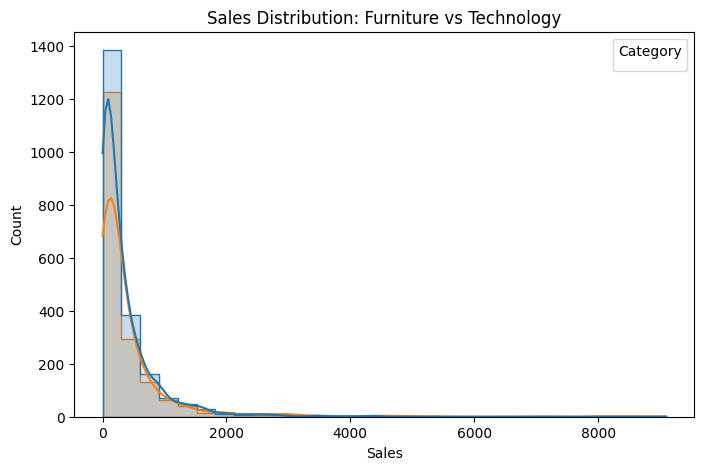

In [6]:
# Histogram of Profit Margin
plt.figure(figsize=(8,5))
sns.histplot(df["Profit Margin"], bins=30, kde=True, color="skyblue")
plt.title("Distribution of Profit Margin")
plt.xlabel("Profit Margin")
plt.ylabel("Frequency")
plt.show()

# Overlay Sales distribution for Furniture vs Technology
plt.figure(figsize=(8,5))
sns.histplot(data=df[df["Category"].isin(["Furniture","Technology"])],
             x="Sales", hue="Category", element="step", bins=30, kde=True)
plt.title("Sales Distribution: Furniture vs Technology")
plt.xlabel("Sales")
plt.ylabel("Count")
plt.legend(title="Category")
plt.show()


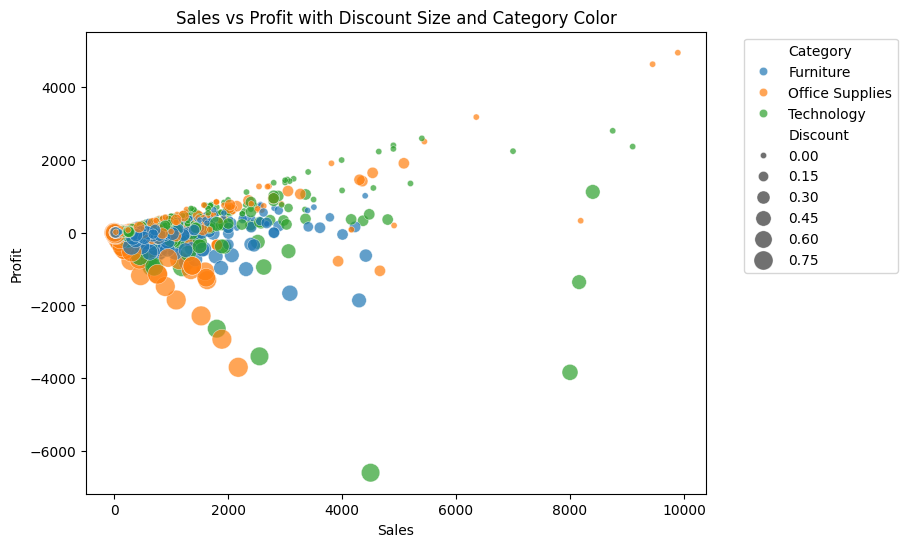

<Figure size 800x600 with 0 Axes>

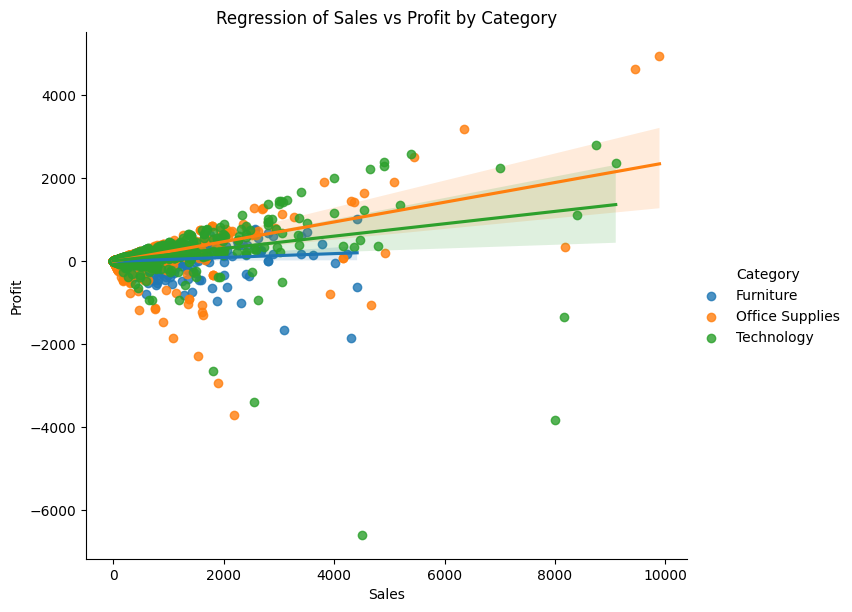

In [7]:
# Scatter plot: Sales vs Profit
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x="Sales", y="Profit",
                size="Discount", hue="Category", alpha=0.7, sizes=(20,200))
plt.title("Sales vs Profit with Discount Size and Category Color")
plt.xlabel("Sales")
plt.ylabel("Profit")
plt.legend(bbox_to_anchor=(1.05,1), loc="upper left")
plt.show()

# Regression lines by Category
plt.figure(figsize=(8,6))
sns.lmplot(data=df, x="Sales", y="Profit", hue="Category", height=6, aspect=1.2)
plt.title("Regression of Sales vs Profit by Category")
plt.xlabel("Sales")
plt.ylabel("Profit")
plt.show()


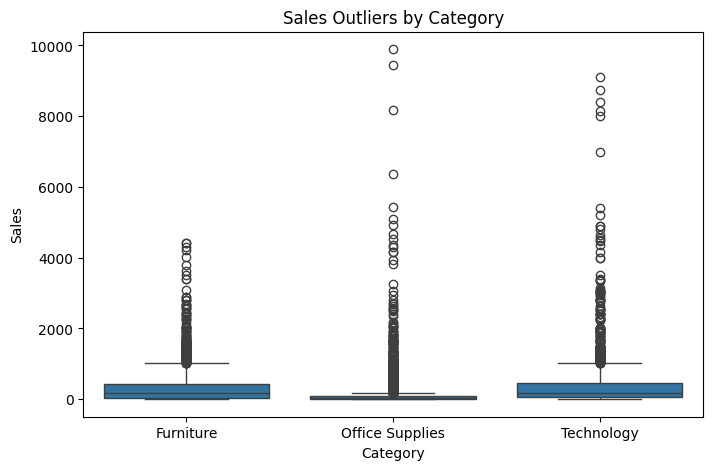

In [7]:
plt.figure(figsize=(8,5))
sns.boxplot(data=df, x="Category", y="Sales")
plt.title("Sales Outliers by Category")
plt.show()


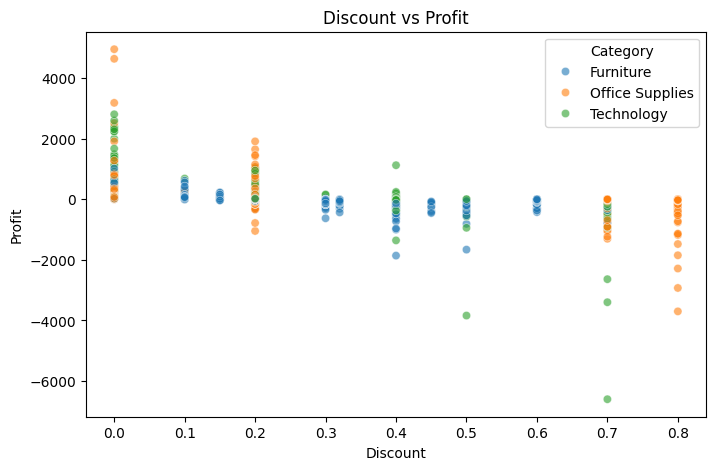

In [8]:
plt.figure(figsize=(8,5))
sns.scatterplot(data=df, x="Discount", y="Profit", hue="Category", alpha=0.6)
plt.title("Discount vs Profit")
plt.xlabel("Discount")
plt.ylabel("Profit")
plt.show()


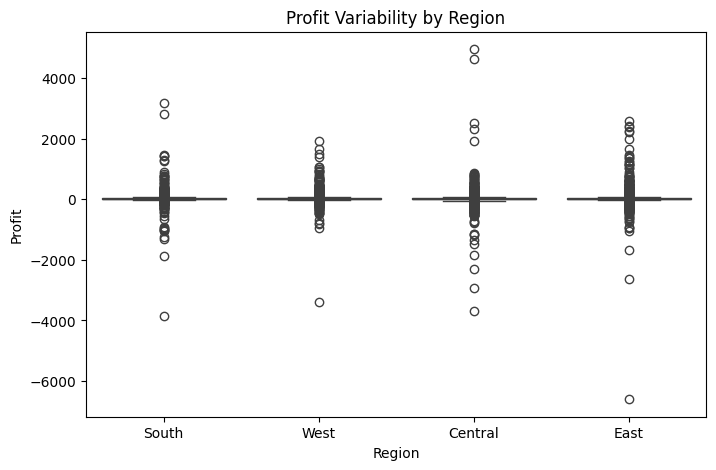

In [6]:
plt.figure(figsize=(8,5))
sns.boxplot(data=df, x="Region", y="Profit")
plt.title("Profit Variability by Region")
plt.show()

C:\Users\haadh\AppData\Local\Temp\ipykernel_24688\2234612938.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=profit_std.index, y=profit_std.values, palette='viridis')
C:\Users\haadh\AppData\Local\Temp\ipykernel_24688\2234612938.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=profit_range.index, y=profit_range.values, palette='plasma')


Profit Statistics by Region:
              mean         std        min        max
Region                                              
Central  13.482509  233.905087 -3701.8928  4946.3700
East     29.010121  221.837594 -6599.9780  2591.9568
South    29.994138  207.985269 -3839.9904  3177.4750
West     31.760921  127.880151 -3399.9800  1906.4850


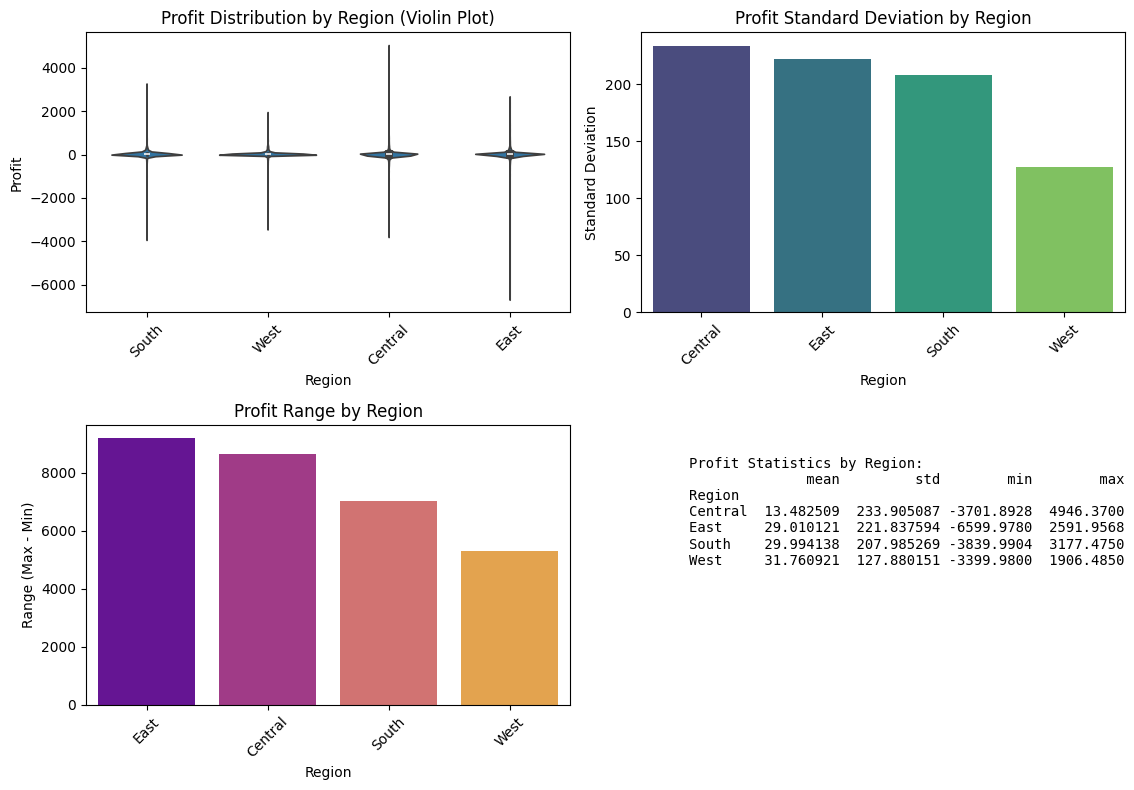

In [9]:
# Additional analysis for profit variability by region
plt.figure(figsize=(12,8))

# Violin plot to show profit distribution by region
plt.subplot(2,2,1)
sns.violinplot(data=df, x="Region", y="Profit")
plt.title("Profit Distribution by Region (Violin Plot)")
plt.xticks(rotation=45)

# Calculate standard deviation for each region
plt.subplot(2,2,2)
profit_std = df.groupby('Region')['Profit'].std().sort_values(ascending=False)
sns.barplot(x=profit_std.index, y=profit_std.values, palette='viridis')
plt.title("Profit Standard Deviation by Region")
plt.ylabel("Standard Deviation")
plt.xticks(rotation=45)

# Range (max - min) by region
plt.subplot(2,2,3)
profit_range = df.groupby('Region')['Profit'].apply(lambda x: x.max() - x.min()).sort_values(ascending=False)
sns.barplot(x=profit_range.index, y=profit_range.values, palette='plasma')
plt.title("Profit Range by Region")
plt.ylabel("Range (Max - Min)")
plt.xticks(rotation=45)

# Summary statistics
plt.subplot(2,2,4)
region_stats = df.groupby('Region')['Profit'].agg(['mean', 'std', 'min', 'max'])
print("Profit Statistics by Region:")
print(region_stats)
plt.axis('off')
plt.text(0.1, 0.5, f"Profit Statistics by Region:\n{region_stats.to_string()}", 
         transform=plt.gca().transAxes, fontsize=10, fontfamily='monospace')

plt.tight_layout()
plt.show()